<a href="https://colab.research.google.com/github/Anjasfedo/Learning-TensorFlow/blob/main/eat_tensorflow2_in_30_days/Chapter1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-2 Example: Modeling Procedure for Images

## 1. Data Preparation

Cifar-2 is dataset that subset of cifar-10, which only contain 2 class: airplane and automobile

each class contain 5000 images for training and 1000 images for testing

There are two way of image preparation in TensorFlow
1. construct image data generator using ImageDataGenerator in tf.keras
2. construct data pipeline using tf.data.Dataset and several methods in tf.image

here is the example of second method

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

BATCH_SIZE = 100

def load_image(img_path, size=(32,32)):
  label = tf.constant(1, tf.int8) if tf.strings.regex_full_match(img_path, ".*automobile*.") else tf.constant(0, tf.int8)

  img = tf.io.read_file(img_path)
  img = tf.image.decode_jpeg(img,
                             channels=3)
  img = tf.image.resize(img, size)/255.0

  return (img, label)

#### Download the dataset

In [17]:
# Clone the repository
!git clone https://github.com/lyhue1991/eat_tensorflow2_in_30_days.git

# Move the downloaded directory to a specific location within the Colab session
!mv eat_tensorflow2_in_30_days/data/cifar2 /content/cifar2

fatal: destination path 'eat_tensorflow2_in_30_days' already exists and is not an empty directory.
mv: cannot stat 'eat_tensorflow2_in_30_days/data/cifar2': No such file or directory


In [18]:
# Parallel pre-processing using num_parallel_calls and caching data with prefetch to improve performance
ds_train = tf.data.Dataset.list_files('/content/cifar2/train/*/*.jpg') \
            .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
            .shuffle(buffer_size=1000) \
            .batch(BATCH_SIZE) \
            .prefetch(tf.data.AUTOTUNE)

ds_test = tf.data.Dataset.list_files('/content/cifar2/test/*/*.jpg') \
            .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
            .batch(BATCH_SIZE) \
            .prefetch(tf.data.AUTOTUNE)

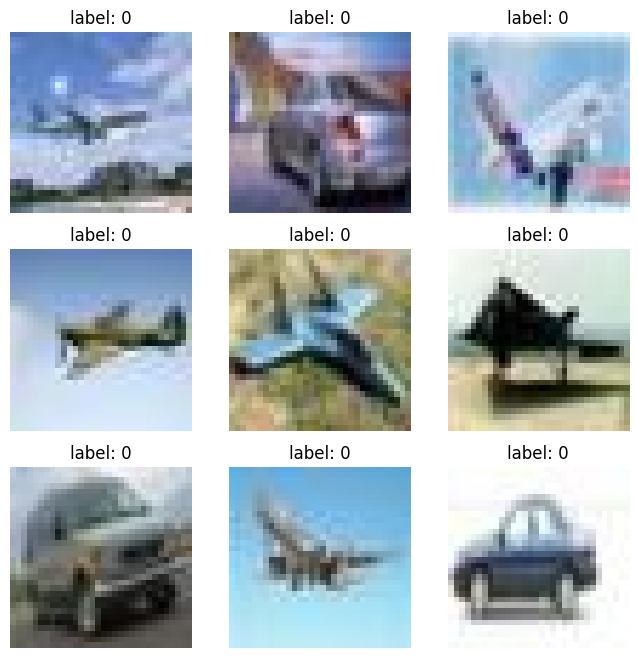

In [21]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
for i, (img, label) in enumerate(ds_train.unbatch().take(9)):
  ax = plt.subplot(3, 3, i+1)
  ax.imshow(img.numpy())
  ax.set_title(f"label: {label}")
  ax.axis("off")
  ax.set_xticks([])
  ax.set_yticks([])

plt.show()

In [20]:
for x,y in ds_train.take(1):
    print(x.shape,y.shape)

(100, 32, 32, 3) (100,)
